# Assigment 1

- Nama         : Ines Savitri
- Kode Peserta : PYTN-KS07-017

### Mendownload Data

In [1]:
import numpy as np
import pandas as pd

In [2]:
df_LondonCrime = pd.read_csv('london_crime_by_lsoa.csv')

df_LondonCrime.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [3]:
# Cleansing Data dengan Standar Missing Values

df_LondonCrime.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of          lsoa_code  borough  major_category  minor_category  value   year  \
0            False    False           False           False  False  False   
1            False    False           False           False  False  False   
2            False    False           False           False  False  False   
3            False    False           False           False  False  False   
4            False    False           False           False  False  False   
...            ...      ...             ...             ...    ...    ...   
1048570      False    False           False           False  False  False   
1048571      False    False           False           False  False  False   
1048572      False    False           False           False  False  False   
1048573      False    False           False           False  False  False   
1048574      False    False           False           False  False  False   

         mont

In [4]:
df_LondonCrime.isnull().values.any()

False

###### Kesimpulan: Berdasarkan keterangan di atas, data yang akan dipakai sudah bersih, tidak ada data yang hilang atau rusak, sehingga data dapat diolah.

In [5]:
df_LondonCrime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   lsoa_code       1048575 non-null  object
 1   borough         1048575 non-null  object
 2   major_category  1048575 non-null  object
 3   minor_category  1048575 non-null  object
 4   value           1048575 non-null  int64 
 5   year            1048575 non-null  int64 
 6   month           1048575 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 56.0+ MB


##### Kesimpulan: Berdasarkan keterangan di atas, dapat diketahui bahwa data berjumlah 7 kolom dan 1048575 baris, dengan tipe data object dan integer.

### Dataset ini berisi :

- lsoa_code      : mewakili kebijakan area
- borough        : wilayah london
- major_category : kategori kejahatan berat
- minor_category : kategori kejahatan ringan
- value          : jumlah kejahatan dalam wilayah tertentu berdasarkan bulan
- year           : tahun ringkasan statistik
- month          : bulan ringkasan statistik

In [6]:
# mendeskripsikan dataframe value
df_LondonCrime.describe().value

count    1.048575e+06
mean     4.753327e-01
std      1.678109e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      2.410000e+02
Name: value, dtype: float64

In [7]:
# melihat 5 data teratas
df_LondonCrime.head(5)

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [8]:
# melihat 5 data terbawah
df_LondonCrime.tail(5)

,lsoa_code,borough,major_category,minor_category,value,year,month
1048570,E01001649,Greenwich,Theft and Handling,Other Theft,3,2010,11
1048571,E01000464,Bexley,Criminal Damage,Criminal Damage To Dwelling,0,2012,3
1048572,E01000064,Barking and Dagenham,Drugs,Possession Of Drugs,1,2010,2
1048573,E01004615,Wandsworth,Criminal Damage,Other Criminal Damage,1,2016,7
1048574,E01001752,Hackney,Other Notifiable Offences,Other Notifiable,0,2008,12


In [9]:
# untuk mendapatkan list header kolom
df_LondonCrime.columns.values

array(['lsoa_code', 'borough', 'major_category', 'minor_category',
       'value', 'year', 'month'], dtype=object)

In [10]:
# untuk mendapatkan daftar indeks
df_LondonCrime.index.values

array([      0,       1,       2, ..., 1048572, 1048573, 1048574],
      dtype=int64)

In [11]:
# melihat dimensi dataframe
df_LondonCrime.shape

(1048575, 7)

### Visualisasi menggunakan Matplotlib

In [12]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')

In [13]:
print('Matplotlib version: ', mpl.__version__)

Matplotlib version:  3.5.1


In [14]:
# menghapus tabel lsoa_code dan month, untuk proses mengolah data per tahun
df_LC = df_LondonCrime.drop(['lsoa_code','month'], axis=1)
df_LC.head()

,borough,major_category,minor_category,value,year
0,Croydon,Burglary,Burglary in Other Buildings,0,2016
1,Greenwich,Violence Against the Person,Other violence,0,2016
2,Bromley,Violence Against the Person,Other violence,0,2015
3,Redbridge,Burglary,Burglary in Other Buildings,0,2016
4,Wandsworth,Robbery,Personal Property,0,2008


In [15]:
# memanggil beberapa tabel yaitu 'borough' dan 'year' untuk mengetahui jumlah kejahatan di suatu daerah per tahun
df_crime1 = df_LC.groupby(['borough','year'], axis=0).sum()
df_crime1.head(9)

value
borough              year       
Barking and Dagenham 2008   1411
                     2009   1339
                     2010   1295
                     2011   1368
                     2012   1357
                     2013   1196
                     2014   1183
                     2015   1409
                     2016   1229

In [16]:
# karena tabel di atas kurang memberikan informasi yang jelas, maka dibuat sebuah variabel baru untuk mengetahui jumlah kejahatan dari berbagai wilayah per tahun
df_caught = df_crime1.unstack()
df_caught.head(10)

value                                                
year                  2008  2009  2010  2011  2012  2013  2014  2015  2016
borough                                                                   
Barking and Dagenham  1411  1339  1295  1368  1357  1196  1183  1409  1229
Barnet                1934  1896  1833  1836  1748  1670  1787  1764  1882
Bexley                1136  1101  1042   915   832   861   893   972  1018
Brent                 1821  1860  1822  2256  2104  1780  1939  1861  2014
Bromley               1936  1694  1594  1491  1689  1496  1434  1547  1472
Camden                2454  2388  2376  2520  2435  2146  2182  2088  2240
City of London           0     0     0     1    20    10    11    13     9
Croydon               2274  2283  2332  2279  2205  2123  2161  2277  2205
Ealing                2191  2334  2390  2277  2193  2128  1908  2014  2120
Enfield               1676  1733  1654  1638  1582  1644  1683  1715  1735

### A. Line Pot

Buatlah sebuah plot: 
Jumlah kejahatan di Greenwich dalam 5 tahun terakhir (2012 - 2016)

In [17]:
# Pre-processing
df_caught.head()

value                                                
year                  2008  2009  2010  2011  2012  2013  2014  2015  2016
borough                                                                   
Barking and Dagenham  1411  1339  1295  1368  1357  1196  1183  1409  1229
Barnet                1934  1896  1833  1836  1748  1670  1787  1764  1882
Bexley                1136  1101  1042   915   832   861   893   972  1018
Brent                 1821  1860  1822  2256  2104  1780  1939  1861  2014
Bromley               1936  1694  1594  1491  1689  1496  1434  1547  1472

In [18]:
df_line = df_caught.loc[['Greenwich']].transpose()
df_line.tail(5)

borough     Greenwich
      year           
value 2012       1518
      2013       1508
      2014       1502
      2015       1643
      2016       1770

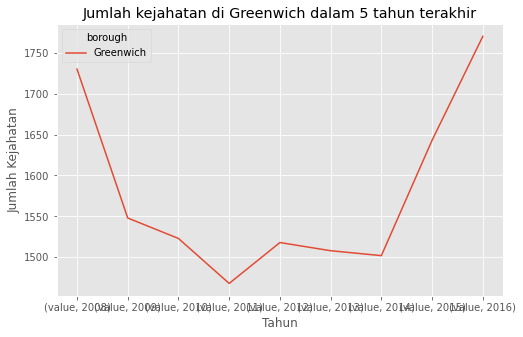

In [19]:
# Visualisasikan data

df_line.plot(kind='line', figsize=(8,5))

plt.title('Jumlah kejahatan di Greenwich dalam 5 tahun terakhir')
plt.ylabel('Jumlah Kejahatan')
plt.xlabel('Tahun')

plt.show()

Kesimpulan: berdasarkan plot di atas dapat diketahui bahwa data 'Jumlah Kejahatan di Greenwich selama 2012 - 2016', bersifat fluktuatif (naik-turun), pada tahun 2012 kejahatan mengalami penurunan lalu dimulai tahun 2015-2016 kejahatan melonjak sangat tinggi. Tingkat kejahatan dikelompokkan menjadi 2 yaitu kejahatan besar dan kejahatan kecil. 

### B. Area Plot

Buatlah plot perbandingan banyaknya kejahatan di 2 wilayah

In [22]:
# Pre-processing
df_LC.head()

,borough,major_category,minor_category,value,year
0,Croydon,Burglary,Burglary in Other Buildings,0,2016
1,Greenwich,Violence Against the Person,Other violence,0,2016
2,Bromley,Violence Against the Person,Other violence,0,2015
3,Redbridge,Burglary,Burglary in Other Buildings,0,2016
4,Wandsworth,Robbery,Personal Property,0,2008


In [23]:
df_crime1.head()

value
borough              year       
Barking and Dagenham 2008   1411
                     2009   1339
                     2010   1295
                     2011   1368
                     2012   1357

In [24]:
df_caught.head()

value                                                
year                  2008  2009  2010  2011  2012  2013  2014  2015  2016
borough                                                                   
Barking and Dagenham  1411  1339  1295  1368  1357  1196  1183  1409  1229
Barnet                1934  1896  1833  1836  1748  1670  1787  1764  1882
Bexley                1136  1101  1042   915   832   861   893   972  1018
Brent                 1821  1860  1822  2256  2104  1780  1939  1861  2014
Bromley               1936  1694  1594  1491  1689  1496  1434  1547  1472

In [25]:
df_areacrime = df_caught.loc[['Westminster', 'Sutton']]
df_areacrime = df_areacrime.transpose()
df_areacrime

borough     Westminster  Sutton
      year                     
value 2008         3040     908
      2009         3172     973
      2010         2706     950
      2011         3908     878
      2012         5613     865
      2013         4322     966
      2014         3679     770
      2015         3900     755
      2016         3732     842

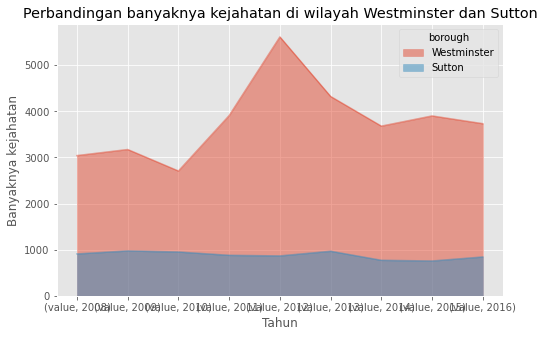

In [26]:
# Visualisasi data area plot
df_areacrime.plot(kind='area',
                  alpha=0.5,
                  stacked=False,
                  figsize=(8,5)
                 )

plt.title('Perbandingan banyaknya kejahatan di wilayah Westminster dan Sutton')
plt.ylabel('Banyaknya kejahatan')
plt.xlabel('Tahun')

plt.show()

Kesimpulan: berdasarkan area plot di atas, dapat diketahui bahwa wilayah Westminster memiliki tingkat kejahatan yang sangat tinggi jika dibandingkan dengan wilayah Sutton. Tingkat kejahatan dikelompokkan menjadi 2 yaitu kejahatan besar dan kejahatan kecil.

### C. Histogram

Buatlah plot jumlah kejahatan di wilayah Croydon

In [51]:
# Pre-processing
histogram = df_LondonCrime.groupby('borough').sum()
df_total = histogram[['value']]
df_total.head(10)

,value
borough,
Barking and Dagenham,11787
Barnet,16350
Bexley,8770
Brent,17457
Bromley,14353
Camden,20829
City of London,64
Croydon,20139
Ealing,19555


In [81]:
df_hist1 = df_caught.loc['Croydon']
df_hist1 = df_hist1.transpose()
df_hist1

       year
value  2008    2274
       2009    2283
       2010    2332
       2011    2279
       2012    2205
       2013    2123
       2014    2161
       2015    2277
       2016    2205
Name: Croydon, dtype: int64

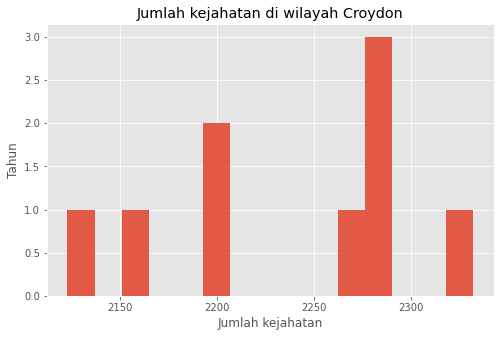

In [84]:
df_hist1.plot(kind='hist', 
              figsize=(8,5),
              bins=15,
              alpha=0.9)

plt.title('Jumlah kejahatan di wilayah Croydon')
plt.ylabel('Tahun')
plt.xlabel('Jumlah kejahatan')

plt.show()

### D. Bar Chart

Buatlah sebuah plot: Total kejahatan di London dari setiap wilayah

In [20]:
# Pre-processing
wilayah = df_LondonCrime.groupby('borough').sum()
total = wilayah[['value']]
total.head(100)

,value
borough,
Barking and Dagenham,11787
Barnet,16350
Bexley,8770
Brent,17457
Bromley,14353
Camden,20829
City of London,64
Croydon,20139
Ealing,19555


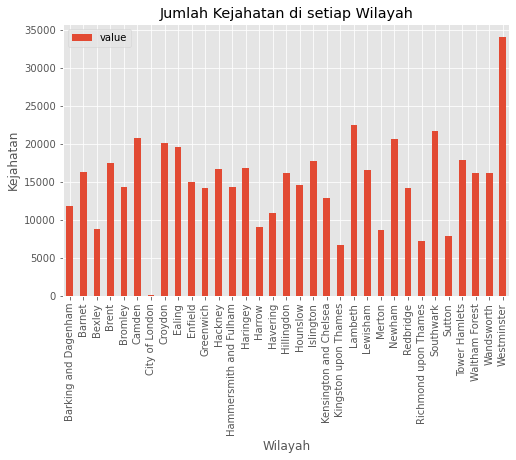

In [21]:
total.plot(kind='bar', figsize=(8, 5))

plt.title('Jumlah Kejahatan di setiap Wilayah')
plt.ylabel('Kejahatan')
plt.xlabel('Wilayah')

plt.show()

Kesimpulan : berdasarkan plot di atas dapat diketahui jumlah kejahatan di setiap wilayah, wilayah City of London mempunyai tingkat kejahatan yang sangat rendah, sedangkan wilayah Westminster mempunyai tingkat kejahatan yang sangat tinggi. Tingkat kejahatan dikelompokkan menjadi 2 yaitu kejahatan besar dan kejahatan kecil. 

### E. Pie Chart

Buatlah plot jumlah kejahatan berat di London dari tahun 2008 - 2016

In [85]:
# Pre-processing
df_KejahatanBerat = df_LondonCrime.groupby('major_category').sum()
KejahatanBerat = df_KejahatanBerat[['value']]
KejahatanBerat

,value
major_category,
Burglary,58754
Criminal Damage,48162
Drugs,35881
Fraud or Forgery,489
Other Notifiable Offences,8272
Robbery,20431
Sexual Offences,85
Theft and Handling,204713
Violence Against the Person,121635


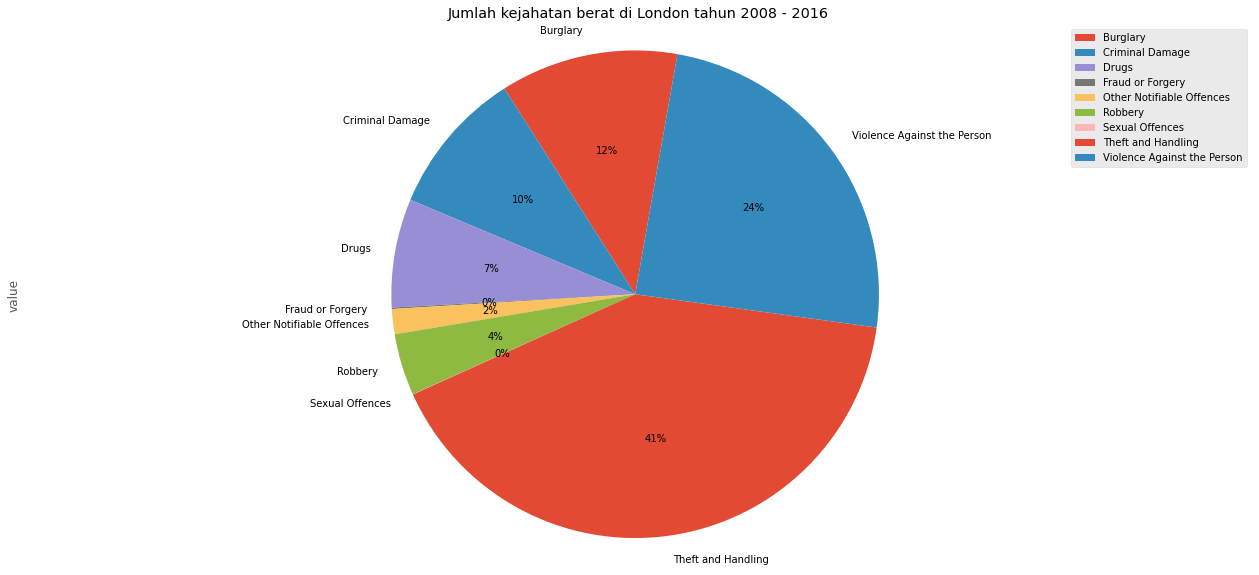

In [89]:
# Visualisasi data
KejahatanBerat.plot(kind='pie',
                    figsize=(22, 10),
                    autopct='%1.0f%%',
                    startangle=80,
                    subplots='True'
                   )

plt.title('Jumlah kejahatan berat di London tahun 2008 - 2016')
plt.axis('equal')

plt.show()

Kesimpulan: Tingkat kejahatan dikelompokkan menjadi 2 yaitu kejahatan besar dan kejahatan kecil. berdasarkan pie chart di atas, dapat diketahui bahwa tingkat kejahatan berat yang terjadi di London tahun 2008 - 2016 paling banyak adalah Pencurian dan Penanganan dengan persentase sebesar 41.3%

### F. Scatter Plot

In [90]:
# Pre-processing
df_LC.head()

,borough,major_category,minor_category,value,year
0,Croydon,Burglary,Burglary in Other Buildings,0,2016
1,Greenwich,Violence Against the Person,Other violence,0,2016
2,Bromley,Violence Against the Person,Other violence,0,2015
3,Redbridge,Burglary,Burglary in Other Buildings,0,2016
4,Wandsworth,Robbery,Personal Property,0,2008


In [29]:
df_scatter = df_LC.groupby(['year'], axis=0).sum()
df_scatter.reset_index(inplace=True)
df_scatter

,year,value
0,2008,56825
1,2009,54887
2,2010,54607
3,2011,55771
4,2012,57838
5,2013,53734
6,2014,51644
7,2015,55841
8,2016,57275


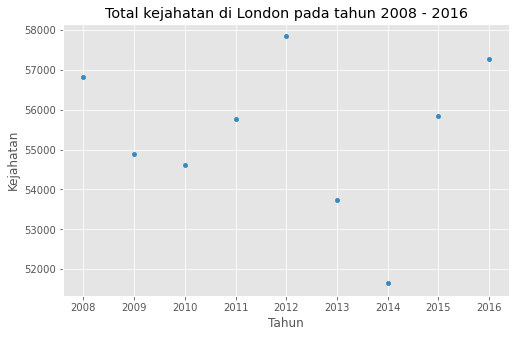

In [30]:
# Visualisasi Data
df_scatter.plot(kind='scatter', x='year', y='value', figsize=(8,5))

plt.title('Total kejahatan di London pada tahun 2008 - 2016')
plt.xlabel('Tahun')
plt.ylabel('Kejahatan')

plt.show()

Kesimpulan: Berdasarkan plot di atas dapat diketahui bahwa total angka kejahatan yang terjadi di London pada tahun 2008-2016 menyebar secara acak dan tidak membentuk pola tertentu.

### Overall Analysist

Plotting pairwise of columns


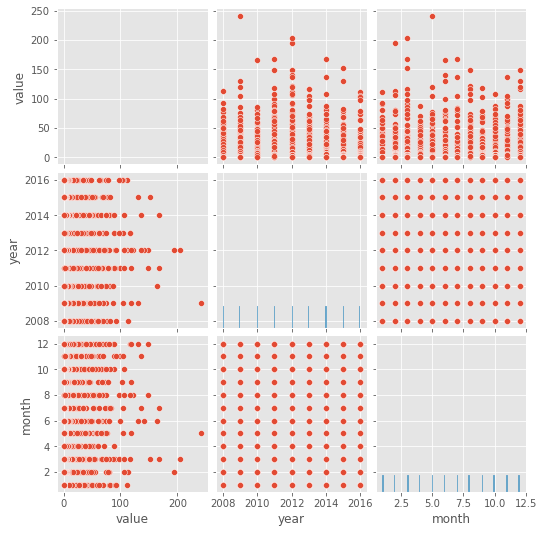

In [35]:
import seaborn as sns

print("Plotting pairwise of columns")
sns.pairplot(df_LondonCrime)